# Basic Statistics in Python

Dataset from Kaggle : **"Aviation Accident Database & Synopses"** by *Kheirallah Samaha*  
Source: kaggle.com/khsamaha/aviation-accident-database-synopses/data (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization 
> Plotly : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

plt.rcParams["axes.grid"] = False # Removes default white gridlines from the plot:

In [2]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools
# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)

---

### Import the Dataset

In [3]:
aviationData = pd.read_csv('AviationData.csv', encoding = 'ISO-8859-1')
aviationData.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20200102X82407           Accident      WPR20CA055  31/12/2019   
1  20191231X83852           Accident      CEN20FA049  31/12/2019   
2  20200102X54844           Accident      ANC20CA011  31/12/2019   
3  20191230X91852           Accident      CEN20CA048  30/12/2019   
4  20191228X62945                NaN      WPR20CA053  28/12/2019   

        Location        Country   Latitude   Longitude Airport.Code  \
0        Elk, CA  United States  39.128611 -123.715833          LLR   
1     OLATHE, KS  United States  38.846111  -94.736111          OJC   
2  Fairbanks, AK  United States  64.666945 -148.133334          NaN   
3   GRANBURY, TX  United States  32.365556  -97.645000          NaN   
4   Missoula, MT  United States        NaN         NaN          MSO   

               Airport.Name  ... Purpose.of.Flight Air.Carrier  \
0              Little River  ...          Personal         NaN   
1  Johnson County Executive  ...          Personal         NaN   
2                       NaN  ...          Personal         NaN   
3                       NaN  ...          Personal         NaN   
4                       NaN  ...               NaN         NaN   

  Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.Injuries  \
0                  NaN                    NaN                  NaN   
1                  2.0                    NaN                  NaN   
2                  NaN                    NaN                  NaN   
3                  NaN                    NaN                  NaN   
4                  NaN                    NaN                  NaN   

  Total.Uninjured Weather.Condition  Broad.Phase.of.Flight Report.Status  \
0             1.0               VMC                TAKEOFF       Factual   
1             NaN               VMC                TAKEOFF   Preliminary   
2             2.0               NaN                    NaN   Preliminary   
3             1.0               NaN                    NaN   Preliminary   
4             NaN               NaN                    NaN   Preliminary   

  Publication.Date  
0       13/01/2020  
1       08/01/2020  
2       02/01/2020  
3       31/12/2019  
4       03/01/2020  

[5 rows x 31 columns]

In [6]:
# Separating the date column into year, month, day
aviationData['day'], aviationData['month'] ,aviationData['year'] = zip(*aviationData['Event.Date'].map(lambda x: str(x).split('/')))

# Changing the fatal column to 'Non-Fatal', 'None', 'Fatal', or 'Unknown', and adding a 'Fatal_Count' in a separate column
import re
import numpy as np
fatal_counts = []
fatal_bools = []
for i in range(len(aviationData)):
    fatal_resp = aviationData.iloc[i]['Injury.Severity']
    if str(fatal_resp) == 'Non-Fatal':
        fatal_counts.append(0)
        fatal_bools.append("None")
    elif fatal_resp is not None:
        num = re.sub(r'\D', "", str(fatal_resp))
        if num == "":
            fatal_counts.append(np.nan)
            fatal_bools.append("Unknown")
        else:
            fatal_counts.append(int(num))
            fatal_bools.append("Fatal")
    else:
        fatal_counts.append(np.nan)
        fatal_bools.append("Unknown")
aviationData['Fatal_Counts'] = fatal_counts
aviationData['Fatal_Bool'] = fatal_bools

In [63]:
aviationData.describe()

Latitude     Longitude  Number.of.Engines  Total.Fatal.Injuries  \
count  30163.000000  30154.000000       79228.000000          57059.000000   
mean      37.544907    -93.508337           1.146930              0.847614   
std       12.370282     39.454412           0.447004              6.292468   
min      -78.016945   -178.676111           0.000000              0.000000   
25%       33.307778   -114.861042           1.000000              0.000000   
50%       38.125278    -94.371667           1.000000              0.000000   
75%       42.524723    -81.650278           1.000000              1.000000   
max       89.218056    179.618611           8.000000            349.000000   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
count            54384.000000          55592.000000     69673.000000   
mean                 0.331715              0.518708         5.901325   
std                  1.375602              2.771339        29.534302   
min                  0.000000              0.000000         0.000000   
25%                  0.000000              0.000000         0.000000   
50%                  0.000000              0.000000         1.000000   
75%                  0.000000              1.000000         2.000000   
max                111.000000            380.000000       699.000000   

       Fatal_Counts  
count  80494.000000  
mean       0.600567  
std        5.311828  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      349.000000

In [64]:
aviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 36 columns):
Event.Id                  84262 non-null object
Investigation.Type        84257 non-null object
Accident.Number           84262 non-null object
Event.Date                84262 non-null object
Location                  84185 non-null object
Country                   83755 non-null object
Latitude                  30163 non-null float64
Longitude                 30154 non-null float64
Airport.Code              47723 non-null object
Airport.Name              50439 non-null object
Injury.Severity           84262 non-null object
Aircraft.Damage           81553 non-null object
Aircraft.Category         27508 non-null object
Registration.Number       80412 non-null object
Make                      84192 non-null object
Model                     84163 non-null object
Amateur.Built             83653 non-null object
Number.of.Engines         79228 non-null float64
Engine.Type             

## Univariate Plots Section

### Accidents by Year and Month

Plot frequency histograms for the year, month, and weekday of accidents in the dataset.

The majority of the observations in the dataframe are from after the early 1980s onwards. So let’s generate a plot from 1980 to 2019.

In [8]:
aviationData[aviationData["Investigation.Type"]=="Accident"].groupby('year').head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20200102X82407           Accident      WPR20CA055  31/12/2019   
1      20191231X83852           Accident      CEN20FA049  31/12/2019   
2      20200102X54844           Accident      ANC20CA011  31/12/2019   
3      20191230X91852           Accident      CEN20CA048  30/12/2019   
5      20191228X23853           Accident      CEN20MA044  28/12/2019   
...               ...                ...             ...         ...   
84257  20041105X01764           Accident      CHI79FA064  02/08/1979   
84258  20001218X45448           Accident      LAX96LA321  19/06/1977   
84259  20061025X01555           Accident      NYC07LA005  30/08/1974   
84260  20001218X45447           Accident      LAX94LA336  19/07/1962   
84261  20001218X45444           Accident      SEA87LA080  24/10/1948   

              Location        Country   Latitude   Longitude Airport.Code  \
0              Elk, CA  United States  39.128611 -123.715833          LLR   
1           OLATHE, KS  United States  38.846111  -94.736111          OJC   
2        Fairbanks, AK  United States  64.666945 -148.133334          NaN   
3         GRANBURY, TX  United States  32.365556  -97.645000          NaN   
5        LAFAYETTE, LA  United States  30.176111  -92.007500          LFT   
...                ...            ...        ...         ...          ...   
84257       Canton, OH  United States        NaN         NaN          NaN   
84258       EUREKA, CA  United States        NaN         NaN          NaN   
84259    Saltville, VA  United States  36.922223  -81.878056          NaN   
84260   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
84261  MOOSE CREEK, ID  United States        NaN         NaN          NaN   

                   Airport.Name  ... Total.Uninjured Weather.Condition  \
0                  Little River  ...             1.0               VMC   
1      Johnson County Executive  ...             NaN               VMC   
2                           NaN  ...             2.0               NaN   
3                           NaN  ...             1.0               NaN   
5        Lafayette Regional Apt  ...             NaN               IMC   
...                         ...  ...             ...               ...   
84257                       NaN  ...             NaN               VMC   
84258                       NaN  ...             0.0               IMC   
84259                       NaN  ...             NaN               IMC   
84260                       NaN  ...             0.0               UNK   
84261                       NaN  ...             0.0               UNK   

      Broad.Phase.of.Flight   Report.Status Publication.Date day month  year  \
0                   TAKEOFF         Factual       13/01/2020  31    12  2019   
1                   TAKEOFF     Preliminary       08/01/2020  31    12  2019   
2                       NaN     Preliminary       02/01/2020  31    12  2019   
3                       NaN     Preliminary       31/12/2019  30    12  2019   
5                   TAKEOFF     Preliminary       06/01/2020  28    12  2019   
...                     ...             ...              ...  ..   ...   ...   
84257              APPROACH  Probable Cause       16/04/1980  02    08  1979   
84258                CRUISE  Probable Cause       12/09/2000  19    06  1977   
84259                CRUISE  Probable Cause       26/02/2007  30    08  1974   
84260               UNKNOWN  Probable Cause       19/09/1996  19    07  1962   
84261                CRUISE  Probable Cause              NaN  24    10  1948   

      Fatal_Counts Fatal_Bool  
0              0.0       None  
1              2.0      Fatal  
2              0.0       None  
3              0.0       None  
5              5.0      Fatal  
...            ...        ...  
84257          1.0      Fatal  
84258          2.0      Fatal  
84259          3.0      Fatal  
84260          4.0      Fatal  
84261          2.0   

#### Year of Record Accident/Incident

Text(0.5, 1.0, 'Year of Record Accident/Incident (1948-2019)')

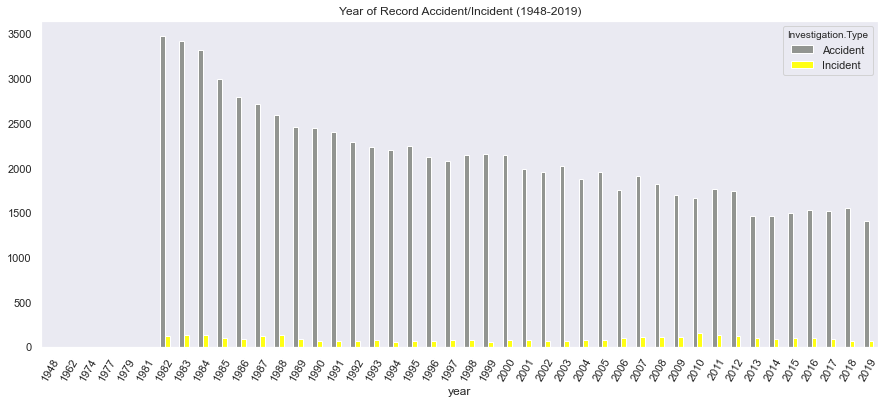

In [9]:
investTypeYear = aviationData[["Investigation.Type", "year"]]

#investTypeYear = investTypeYear[investTypeYear['Investigation.Type'] == "Accident"]
(investTypeYear.groupby(['year','Investigation.Type'])['Investigation.Type'].count().unstack())[['Accident','Incident']].plot(kind='bar',color=['xkcd:grey','xkcd:yellow'],figsize=(15,6))

plt.xticks(rotation=60)
plt.title('Year of Record Accident/Incident (1948-2019)')


The number of accidents has overall decreased by approx. 59% between 1982 and 2017 from approx. 3400 observations to approx. 1400 observations.

#### Month of Record Accident/Incident

Text(0.5, 1.0, 'Month of Record Accident/Incident (1948-2019)')

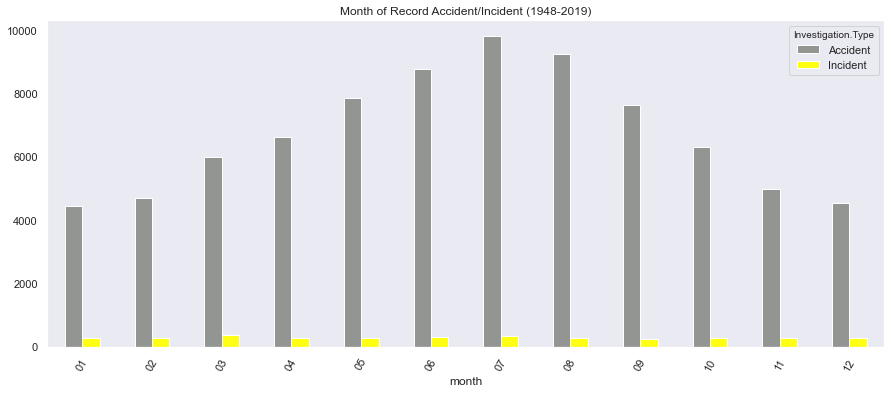

In [10]:
investTypeMonth = aviationData[["Investigation.Type", "month"]]

(investTypeMonth.groupby(['month','Investigation.Type'])['Investigation.Type'].count().unstack())[['Accident','Incident']].plot(kind='bar',color=['xkcd:grey','xkcd:yellow'],figsize=(15,6))

plt.xticks(rotation=60)
plt.title('Month of Record Accident/Incident (1948-2019)')

The highest number of accidents in the dataset for a given year take place during northern hemisphere summer time (Jun-Jul-Aug). This is also likely to be correlated with the increased numbers of flights during the summer holiday period.

### Total Fatal Injuries

In [17]:
def fatalGroup(item):
    if item == 0:
        return '0'
    elif item==1:
        return '1'
    elif item==2:
        return '2'
    elif item==3:
        return '3'
    elif item==4:
        return '4'
    elif item ==5:
        return '5'
    elif 6<item<=10:
        return '6-10'
    elif 10<item<=20:
        return '10-20'
    elif 20<item<=50:
        return '21-50'
    elif 50<item<=100:
        return '51-100'
    elif 100<item<=150:
        return '101-150'
    elif 150<item<=200:
        return '151-200'
    elif 200<item<=250:
        return '201-250'
    elif 250<item<300:
        return '251-300'

In [79]:
fatal_count = pd.DataFrame(aviationData['Fatal_Counts'])
# fill missing value
fatal_count.fillna(value=0,inplace = True)
fatal_count['fatal_range'] = fatal_count.apply(lambda row: fatalGroup(row['Fatal_Counts']), axis = 1)

rearrange = fatal_count.groupby(['fatal_range', 'Fatal_Counts'])['Fatal_Counts'].count().unstack()
rearrange.fillna(value = 0, inplace = True)
rearrange.head()


Fatal_Counts     0.0     1.0   11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  \
fatal_range                                                                     
0             67284.0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1                 0.0  8389.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
10-20             0.0     0.0  18.0  11.0  11.0  19.0   5.0   4.0   5.0   5.0   
101-150           0.0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
151-200           0.0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Fatal_Counts  ...  88.0  89.0  90.0  92.0  96.0  97.0  7.0   8.0   9.0   10.0  
fatal_range   ...                                                              
0             ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1             ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
10-20         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
101-150       ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
151-200       ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 124 columns]

### Engine Types

In [19]:
engine_types = pd.DataFrame(aviationData['Engine.Type'])
engine_types.fillna(value = "Unknown", inplace = True)
engine_types.head(10)

Engine.Type
0  Reciprocating
1  Reciprocating
2        Unknown
3        Unknown
4        Unknown
5     Turbo Prop
6    Turbo Shaft
7        Unknown
8        Unknown
9        Unknown

Text(0.5, 1.0, 'Engine Type in Observations (1948-2019)')

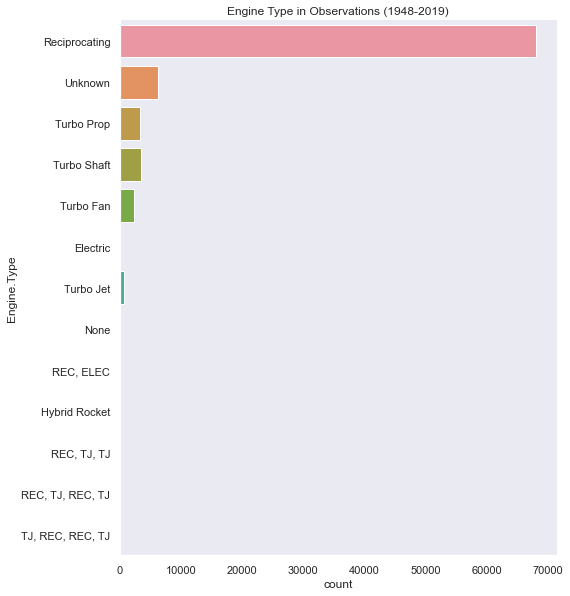

In [80]:
sb.catplot(y = 'Engine.Type', data = engine_types, kind = "count", height = 8)
plt.title('Engine Type in Observations (1948-2019)')

According to the plots above, the bulk of engine types in the reported accidents are Reciprocating engine types.

### Weather Conditions

VMC: conditions are such that pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft.

IMC: conditions require pilots to fly primarily by reference to instruments.


Text(0.5, 1.0, 'Weather Condition in Observations (1948-2019)')

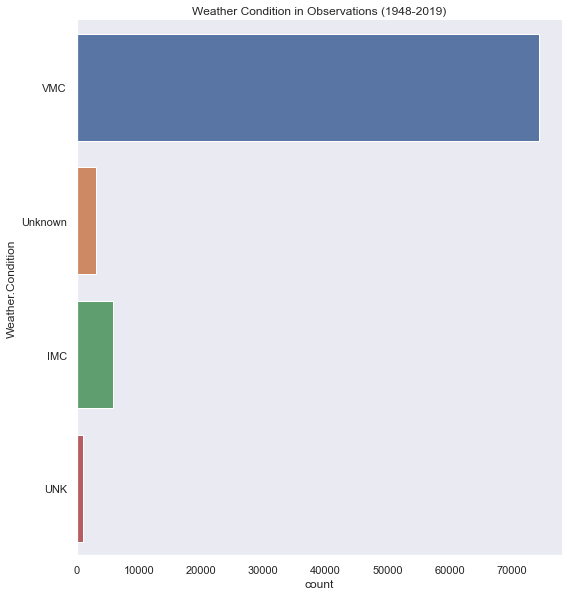

In [82]:
weather_c = pd.DataFrame(aviationData['Weather.Condition'])
weather_c.fillna(value = "Unknown", inplace = True)

sb.catplot(y = 'Weather.Condition', data = weather_c, kind = "count", height = 8)
plt.title('Weather Condition in Observations (1948-2019)')

The bulk of accidents in the dataset take place during VMC weather conditions, which are great conditions for flying as VMC requires greater visibility and cloud clearance than IMC.

### Number of Engines

Text(0.5, 1.0, 'Number of Engines in Observations (1948-2019)')

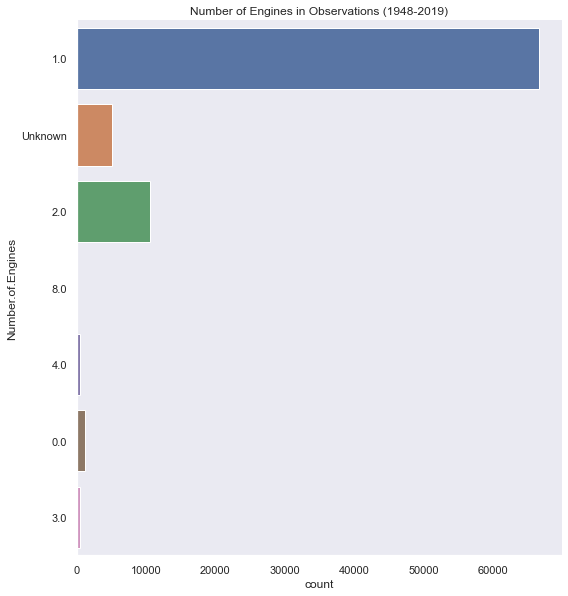

In [81]:
noEngine = pd.DataFrame(aviationData['Number.of.Engines'])
noEngine.fillna(value = "Unknown", inplace = True)
sb.catplot(y = 'Number.of.Engines', data = noEngine, kind = "count", height = 8)
plt.title('Number of Engines in Observations (1948-2019)')


### Broad Phases of Flight

Text(0.5, 1.0, 'Broad Phase of Flight in Observations (1948-2019)')

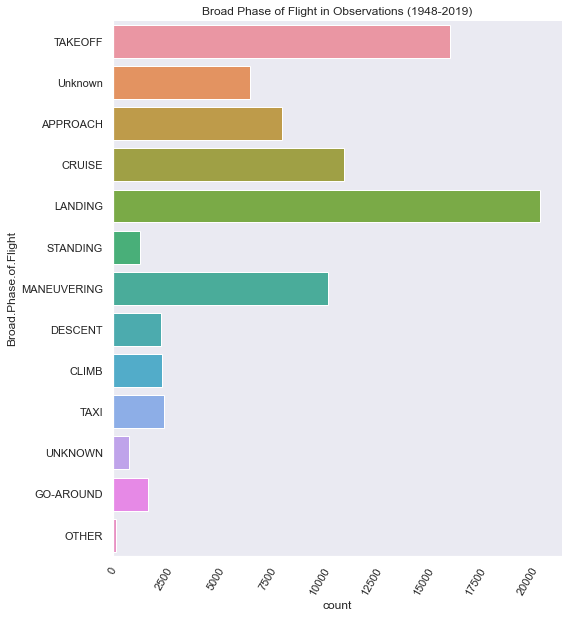

In [69]:
phase = pd.DataFrame(aviationData['Broad.Phase.of.Flight'])
phase.fillna(value = "Unknown", inplace = True)
sb.catplot(y = 'Broad.Phase.of.Flight', data = phase, kind = "count", height = 8)
plt.xticks(rotation=60)
plt.title('Broad Phase of Flight in Observations (1948-2019)')

According to the plot, the bulk of accidents took place during landing or take-off. It is well known in the industry that these are high-risk.

## Bivariate Plots Section

The relationship between pairs of variables that could show interesting relationship

In [32]:
# Function to create heatmap
def heatmap(df, category):
    temp = df[[category, 'year', 'Fatal_Counts']]
    temp = temp.dropna()
    temp = temp[temp['Fatal_Counts'] > 0]
    years = []
    descs = []
    fat_sum = []
    for k,g in temp.groupby(['year', category]):
        (year, desc) = k
        sum_fatal = sum(g['Fatal_Counts'])
        years.append(year)
        descs.append(desc)
        fat_sum.append(sum_fatal)
        dict_to_plot = {
                            'year':years,
                            category:descs,
                            'fatal':fat_sum
                        }
    print(len(years))
    return dict_to_plot

### Engine Types and Total Fatal Injuries

Text(0.5, 1.0, 'Accidents with at least one fatality for Engine.Type')

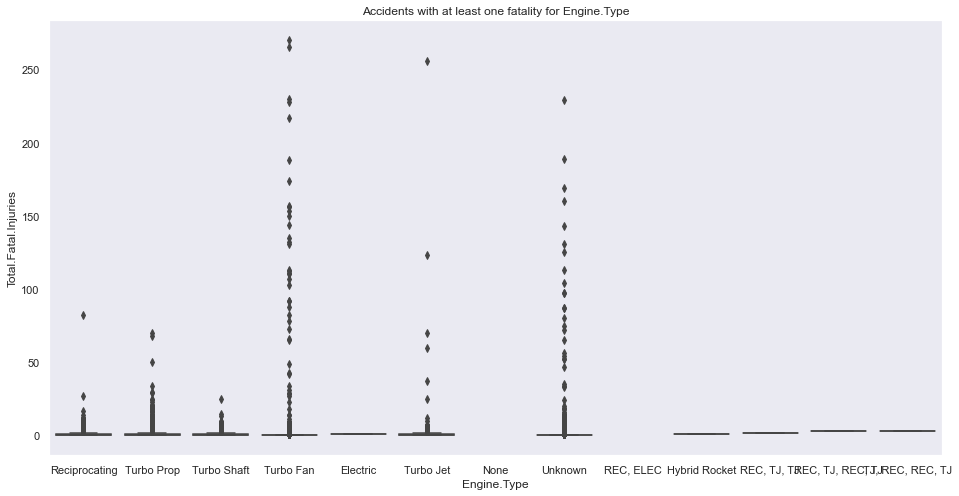

In [83]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Engine.Type', y = 'Total.Fatal.Injuries', data = aviationData)
plt.title('Accidents with at least one fatality for Engine.Type')

In [44]:
# Fatalities By Weather Condition
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Engine.Type')['fatal'],
        x=heatmap(aviationData,'Engine.Type')['Engine.Type'],
        y=heatmap(aviationData,'Engine.Type')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Engine.Type',
    xaxis_nticks=36)

fig.show()

225
225
225


The 1st plot shows that the Turbo-Fan engine has more outliers with higher number of fatalities than other engines. From the 2nd plot, the bulk of the data for fatalities under 10 is with the engine type reciprocating engine type.

### Number of Engines Vs Total Fatal

In [78]:
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Number.of.Engines')['fatal'],
        x=heatmap(aviationData,'Number.of.Engines')['Number.of.Engines'],
        y=heatmap(aviationData,'Number.of.Engines')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Number.of.Engines',
    xaxis_nticks=36)

fig.show()

152
152
152


### Weather.Condition Vs Broad.Phase.of.Flight

Text(0.5, 1.0, 'Distribution of Weather.Condition across Broad.Phase.of.Flight')

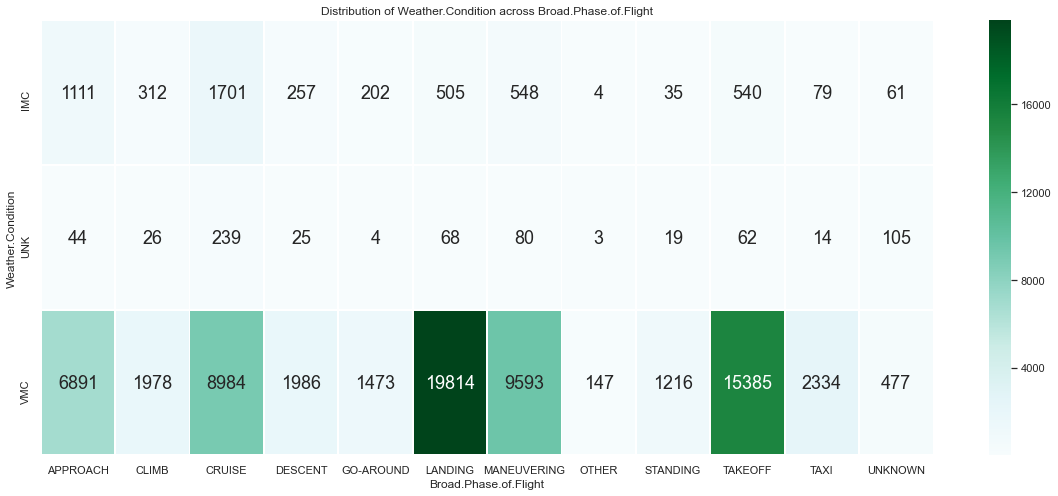

In [84]:
# Distribution of 'Weather.Condition' across 'Broad.Phase.of.Flight'
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(aviationData.groupby(['Weather.Condition', 'Broad.Phase.of.Flight']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.title('Distribution of Weather.Condition across Broad.Phase.of.Flight')

### Weather Conditions Vs. Total Fatal Injuries

In [35]:
# Fatalities By Weather Condition
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Weather.Condition')['fatal'],
        x=heatmap(aviationData,'Weather.Condition')['Weather.Condition'],
        y=heatmap(aviationData,'Weather.Condition')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Weather.Condition',
    xaxis_nticks=36)

fig.show()

110
110
110


As previously noted ,weather conditions do not show a particularly strong relationship with total fatal injuries. The bulk of the distribution is associate with VMC weather conditions. However, that is likely to the fact that the vast majority of flights are flown in VMC conditions.

### Phase of Flight and Total Fatal Injuries

In [37]:
# Fatalities By Broad Phase of Flight
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Broad.Phase.of.Flight')['fatal'],
        x=heatmap(aviationData,'Broad.Phase.of.Flight')['Broad.Phase.of.Flight'],
        y=heatmap(aviationData,'Broad.Phase.of.Flight')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Broad.Phase.of.Flight',
    xaxis_nticks=36)

fig.show()

433
433
433


The plots show that Take-Off and Approach are associated with outliers with high number of fatalities. As previously noted, these two phases of flight are often referred to as “critical phases of flight” for that particular reason.

### Purpose of Flight Vs. Total Fatal Injuries

In [38]:
# Fatalities By Purpose
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Purpose.of.Flight')['fatal'],
        x=heatmap(aviationData,'Purpose.of.Flight')['Purpose.of.Flight'],
        y=heatmap(aviationData,'Purpose.of.Flight')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Purpose.of.Flight',
    xaxis_nticks=36)

fig.show()

542
542
542


The bulk of data falls into Personal.

### Aircraft.Damage VS Total Fatalities

In [67]:
# Fatalities By Aircraft Damage
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Aircraft.Damage')['fatal'],
        x=heatmap(aviationData,'Aircraft.Damage')['Aircraft.Damage'],
        y=heatmap(aviationData,'Aircraft.Damage')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Aircraft.Damage',
    xaxis_nticks=36)

fig.show()

119
119
119


### Country Vs. Total Fatal Injuries

In [40]:
# Fatalities By Country
fig = go.Figure(data=go.Heatmap(
        z=heatmap(aviationData,'Country')['fatal'],
        x=heatmap(aviationData,'Country')['Country'],
        y=heatmap(aviationData,'Country')['year'],
        colorscale='Viridis'))

fig.update_layout(
    title='Accidents with at least one fatality for Country',
    xaxis_nticks=36)

fig.show()

1053
1053
1053


These graphs only took into consideration flights which had at least one fatality. For most of the graphs, at least one column is definitively brighter than the rest, meaning more fatalities occur during those circumstances.
**Weather.Condition** , most accidents with a fatality occurred when the weather was ‘VMC’. 
The possible responses for weather include: VMC, IMC, or UNK. 
VMC represents “weather conditions in which pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft”.
IMC represents “weather conditions that require pilots to fly primarily by reference to instruments, and therefore under instrument flight rules (IFR), rather than by outside visual references under visual flight rules”. 
So, over the years most accidents with fatalities occur when the pilot has full control of the aircraft rather than when the pilot is relying on the plane’s instruments.

**Broad.Phase.of.Flight** more than one column is visibly brighter than the rest, with 'cruise' standing out the most by just a bit. 
'Cruise' signifies the phase of flight that occurs between ascent and descent, the phase that the plane is in for the majority of the flight. The remaining visibly brighter columns include 'takeoff', 'approach', and 'maneuvering' which are three of the main parts of flight.

**Purpose.of.Flight** Personal & Unknown.

**Aircraft.Damage** Expectedly, most aircrafts that have fatal accidents are those where the aircraft gets destroyed.

**Country** US stands out.

### Fatalities VS Year

In [65]:
# Function to calculate the total accidents in a category over time
def sum_over_time(df, category):
    totals = []
    keys = []
    years = []
    for k, g in df.groupby(['year', category]):
        (yr, cat) = k
        
        totals.append(len(g))
        keys.append(cat)
        years.append(yr)
        dict_to_plot = {
                            category : keys,
                            'Total': totals,
                            'Year': years
                        }
    return dict_to_plot

In [66]:
# Total Over time
t = sum_over_time(aviationData, 'Fatal_Bool')
# Tracking fatalities over time

year = t['Year']
t_df = pd.DataFrame(t)
t_df.head()

Fatal_Bool  Total  Year
0      Fatal      1  1948
1      Fatal      1  1962
2      Fatal      1  1974
3      Fatal      1  1977
4      Fatal      1  1979

In [47]:
# Fatal
fat = t_df[t_df['Fatal_Bool'] == 'Fatal']
# Unknown
uk = t_df[t_df['Fatal_Bool'] == 'Unknown']
# Nonfatal
nonfat = t_df[t_df['Fatal_Bool'] == 'None']

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(x=uk['Year'], y=uk['Total'], name = "Unknown"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=fat['Year'], y=fat['Total'], name = "Fatal"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=nonfat['Year'], y=nonfat['Total'], name = "Non Fatal"),
    row=1, col=1
)

fig.update_layout(height=800, width=800, title_text="Number of Accidents Reported")
fig.show()

The number of accidents overall is definitely decreasing, however the number of accidents that have at least one fatality is not decreasing as rapidly, but it is decreasing.

It seemed curious as to why there was such a jump in the 1980’s. 
Sort the accidents by their year to inspect the accidents with the earliest years.

In [49]:
aviationData.sort_values(by=['year'])[:15]

Event.Id Investigation.Type Accident.Number  Event.Date  \
84261  20001218X45444           Accident      SEA87LA080  24/10/1948   
84260  20001218X45447           Accident      LAX94LA336  19/07/1962   
84259  20061025X01555           Accident      NYC07LA005  30/08/1974   
84258  20001218X45448           Accident      LAX96LA321  19/06/1977   
84257  20041105X01764           Accident      CHI79FA064  02/08/1979   
84256  20170710X52551           Accident      NYC79AA106  17/09/1979   
84255  20001218X45446           Accident      CHI81LA106  01/08/1981   
81857  20020917X03774           Accident      MIA82DA171  16/08/1982   
81858  20020917X03773           Accident      MIA82DA170  16/08/1982   
81859  20020917X03692           Accident      LAX82FA305  16/08/1982   
81860  20020917X03513           Incident      FTW82IA331  16/08/1982   
81861  20020917X03193           Accident      DEN82DA174  16/08/1982   
81863  20020917X03183           Accident      DEN82DA164  16/08/1982   
81856  20020917X03999           Accident      NYC82DA201  16/08/1982   
81864  20020917X03034           Accident      CHI82DA311  16/08/1982   

                  Location        Country   Latitude  Longitude Airport.Code  \
84261      MOOSE CREEK, ID  United States        NaN        NaN          NaN   
84260       BRIDGEPORT, CA  United States        NaN        NaN          NaN   
84259        Saltville, VA  United States  36.922223 -81.878056          NaN   
84258           EUREKA, CA  United States        NaN        NaN          NaN   
84257           Canton, OH  United States        NaN        NaN          NaN   
84256           Boston, MA  United States  42.445277 -70.758333          NaN   
84255           COTTON, MN  United States        NaN        NaN          NaN   
81857       CLEARWATER, FL  United States        NaN        NaN          PIE   
81858      GAINESVILLE, FL  United States        NaN        NaN          GNV   
81859       BUENA PARK, CA  United States        NaN        NaN          NaN   
81860          EL PASO, TX  United States        NaN        NaN          ELP   
81861  15MI. NE OF CHR, CO  United States        NaN        NaN          NaN   
81863          DURANGO, CO  United States        NaN        NaN         5C00   
81856          GARDNER, MA  United States        NaN        NaN          NaN   
81864         PLYMOUTH, MI  United States        NaN        NaN          ID2   

               Airport.Name  ... Total.Uninjured Weather.Condition  \
84261                   NaN  ...             0.0               UNK   
84260                   NaN  ...             0.0               UNK   
84259                   NaN  ...             NaN               IMC   
84258                   NaN  ...             0.0               IMC   
84257                   NaN  ...             NaN               VMC   
84256                   NaN  ...            44.0               VMC   
84255                   NaN  ...             0.0               IMC   
81857  ST. PETERSBURG INT'L  ...             2.0               VMC   
81858  GAINESVILLE REGIONAL  ...             0.0               VMC   
81859   FULLERTON MUNICIPAL  ...             1.0               VMC   
81860         EL PASO INT'L  ...             0.0               VMC   
81861                   NaN  ...             1.0               VMC   
81863        ANIMAS AIRPARK  ...             1.0               VMC   
81856     GARDNER MUNICIPAL  ...             2.0               VMC   
81864              METTETAL  ...             1.0               VMC   

      Broad.Phase.of.Flight   Report.Status Publication.Date day month  year  \
84261                CRUISE  Probable Cause              NaN  24    10  1948   
84260               UNKNOWN  Probable Cause       19/09/1996  19    07  1962   
84259                CRUISE  Probable Cause       26/02/2007  30    08  1974   
84258                CRUISE  Probable Cause       12/09/2000  19    06  1977   
84257              APPROACH  Probable Cause       16/04/19

The earliest accidents reported were almost personal flights, with only 6 flights taken into consideration between 1948 – 1982. It would be expected that the accidents reported jump as the commercial aviation industry grew, so the jump in the data is not alarming.

### Longitude and Latitude of Recorded Accidents

There were certain regions which had the tendency to have more accidents. 
There were too many accidents to map on folium, so I took a subset of those accidents reported in 2010. Those with a red marker indicate that the accident had at least one fatality, while a green marker represents that there were no fatalities.

In [56]:
import folium

subset_data = aviationData[['year', 'month', 'Latitude', 'Longitude', 'Fatal_Bool', 'Fatal_Counts']]
subset_data.dropna(inplace=True)
subset_data['year'] = subset_data['year'].astype(int)
recent = subset_data[subset_data['year'] == 2019]
map_ = folium.Map(location =[40,-90], zoom_start = 2)

In [60]:
for i in range(len(recent)):
    lon = recent.iloc[i]['Longitude']
    lat = recent.iloc[i]['Latitude']
    month = recent.iloc[i]['month']
    year = recent.iloc[i]['year']
    fatal = recent.iloc[i]['Fatal_Bool']
    count = recent.iloc[i]['Fatal_Counts']
    popup_str = "Fatal Count " + str(count)
    
    if fatal == "Unknown":
        folium.Marker([lat, lon], popup=popup_str).add_to(map_)
    if fatal == "Fatal":
        folium.Marker([lat, lon], popup=popup_str,icon=folium.Icon(color='red',icon_color='#FFFF00', icon = 'remove-sign')).add_to(map_)
    if fatal == "None":
        folium.Marker([lat, lon], popup=popup_str, icon=folium.Icon(color='green',icon_color='#6fff00', icon = 'ok-sign')).add_to(map_)

In [61]:
map_

Plotting the Latitude vs Longitude of the accidents essentially gives us the map of the US. The plots also indicates that the coastal states are more heavily impacted compared to mid-western states and most of Alaska. This can be explained by the volume of flight to/from destinations those areas of the US. However, while most of the incidents occur in the United States, we do see more green than black. When we observe the incidents outside of the U.S., there is slightly more black than green, meaning more fatalities outside of the U.S.